In [1]:
from utils.DataFrameIO.casf_benchmark_result import get_docking_power_benchmark
import matplotlib.pyplot as plt

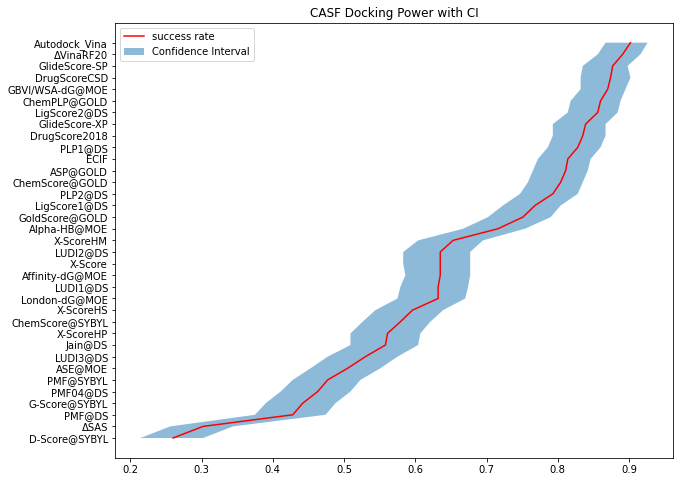

In [2]:
def CI_line(name, sr, left, right):
    """

    :param name:
    :param sr:          top1 success rate
    :param left:        CI left bound
    :param right:       CI right bound
    :return:
    """
    data = get_docking_power_benchmark()
    data = data.append({"name": name, "top1":sr, "left_ci":left, "right_ci":right}, ignore_index=True).sort_values(by=["top1"], ascending=True)
    plt.figure(figsize=(10,8))
    x = list(data["name"])
    left_ci = list(data["left_ci"].astype(float))
    right_ci = list(data["right_ci"].astype(float))
    success_rate = list(data["top1"].astype(float))
    plt.plot(success_rate, x, color='r', label="success rate")
    plt.fill_betweenx(x, left_ci, right_ci, alpha=0.5, label="Confidence Interval")
    plt.legend()
    plt.title("CASF Docking Power with CI")
    plt.show()


CI_line("ECIF", 0.814, 0.772, 0.846)

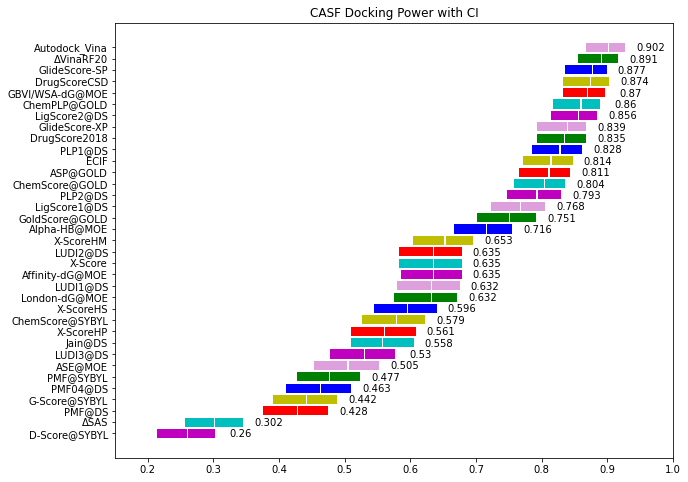

In [3]:
def CI_bar(name, sr, left, right):
    """

    :param name:
    :param sr:          success rate
    :param left:        CI left bound
    :param right:       CI right bound
    :return:
    """
    data = get_docking_power_benchmark()
    data = data.append({"name": name, "top1":sr, "left_ci":left, "right_ci":right}, ignore_index=True).sort_values(by=["top1"], ascending=True)
    plt.figure(figsize=(10,8))
    x = list(data["name"])
    colors = ["m", "c", "r", "y", "b", "g", "plum"]
    left_ci = list(data["left_ci"].astype(float))
    right_ci = list(data["right_ci"].astype(float))
    success_rate = list(data["top1"].astype(float))
    plt.xlim(0.15, 1.00)
    for i in range(data.shape[0]):
        plt.barh(x[i], left=left_ci[i], width=success_rate[i]-left_ci[i]-0.001, color=colors[i%len(colors)])
        rect = plt.barh(x[i], left=success_rate[i]+0.001, width=right_ci[i]-success_rate[i], color=colors[i%len(colors)])
        plt.text(right_ci[i] + 0.04, rect[0].get_y() - 0.1,  str(round(success_rate[i],4)), ha='center', va='bottom')
    plt.title("CASF Docking Power with CI")
    plt.show()


CI_bar("ECIF", 0.814, 0.772, 0.846)